# Ambil Data

Rian Cahyo Anggoro / 234311052

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

acute_inflammations = fetch_ucirepo(id=184)

features = acute_inflammations.data.features
targets = acute_inflammations.data.targets

print(acute_inflammations.metadata)
print(acute_inflammations.variables)

{'uci_id': 184, 'name': 'Acute Inflammations', 'repository_url': 'https://archive.ics.uci.edu/dataset/184/acute+inflammations', 'data_url': 'https://archive.ics.uci.edu/static/public/184/data.csv', 'abstract': 'The data was created by a medical expert as a data set to test the expert system, \nwhich will perform the presumptive diagnosis of two diseases of the urinary system.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 120, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['bladder-inflammation', 'nephritis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2003, 'last_updated': 'Tue Apr 16 2024', 'dataset_doi': '10.24432/C5V59S', 'creators': ['Jacek Czerniak'], 'intro_paper': {'ID': 477, 'type': 'NATIVE', 'title': 'Application of rough sets in the presumptive diagnosis of urinary system diseases', 'authors'

# Deskripsi Dataset


In [3]:
#@title Target prediksi

print("Daftar target tersedia:", list(targets.columns))
print("Target yang diprediksi:", list(targets.columns)[0])

# Simpan target
target = targets.iloc[:, 0]

Daftar target tersedia: ['bladder-inflammation', 'nephritis']
Target yang diprediksi: bladder-inflammation


In [4]:
#@title Jumlah kolom fitur
features.shape

(120, 6)

In [5]:
#@title Jumlah kolom target
targets.shape

(120, 2)

In [6]:
#@title Isi kolom fitur dan target
print("Isi kolom fitur dan target:")
features.info()
target.info()

Isi kolom fitur dan target:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        120 non-null    float64
 1   nausea             120 non-null    object 
 2   lumbar-pain        120 non-null    object 
 3   urine-pushing      120 non-null    object 
 4   micturition-pains  120 non-null    object 
 5   burning-urethra    120 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.8+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: bladder-inflammation
Non-Null Count  Dtype 
--------------  ----- 
120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [7]:
#@title Tipe data kolom fitur
features.dtypes

,0
temperature,float64
nausea,object
lumbar-pain,object
urine-pushing,object
micturition-pains,object
burning-urethra,object


In [8]:
#@title Tipe data kolom target
target.dtypes
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: bladder-inflammation
Non-Null Count  Dtype 
--------------  ----- 
120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [9]:
display(features)
display(target)

,temperature,nausea,lumbar-pain,urine-pushing,micturition-pains,burning-urethra
0,35.5,no,yes,no,no,no
1,35.9,no,no,yes,yes,yes
2,35.9,no,yes,no,no,no
3,36.0,no,no,yes,yes,yes
4,36.0,no,yes,no,no,no
...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes
116,41.5,no,no,no,no,no
117,41.5,yes,yes,no,yes,no
118,41.5,no,yes,yes,no,yes


,bladder-inflammation
0,no
1,yes
2,no
3,yes
4,no
...,...
115,no
116,no
117,no
118,no


# Kondisi Data

In [10]:
#@title Cek missing values
import pandas as pd

print("\nCek missing values:")
print(pd.concat([features, target], axis=1).isnull().sum())


Cek missing values:
temperature             0
nausea                  0
lumbar-pain             0
urine-pushing           0
micturition-pains       0
burning-urethra         0
bladder-inflammation    0
dtype: int64


In [11]:
#@title Cek duplicate data
print("\nCek duplicate data:")
print(pd.concat([features, target], axis=1).duplicated().sum())


Cek duplicate data:
21


In [12]:
#@title Cek Outliers pada kolom numerik
numerical_columns = ['temperature']

outliers_found = False
outlier_features = []

for col in numerical_columns:
    Q1 = features[col].quantile(0.25)
    Q3 = features[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = features[(features[col] < lower_bound) | (features[col] > upper_bound)]

    if not outliers.empty:
        outliers_found = True
        outlier_features.append(col)

print("Outliers: ", end="")
if outliers_found:
    print(f"Ada, pada fitur: {', '.join(outlier_features)}")
else:
    print("Tidak ada")

Outliers: Tidak ada


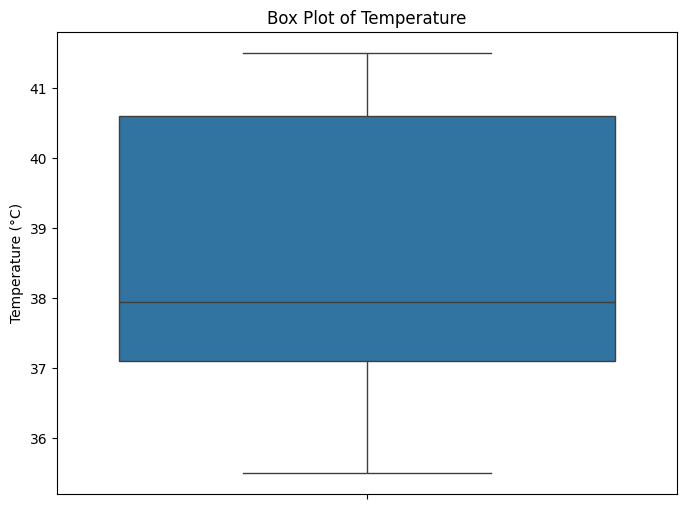

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=features['temperature'])
plt.title('Box Plot of Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

In [14]:
#@title Cek Imbalanced Data
imbalanced_status = []
ratio_details = []

col = target.name
value_counts = target.value_counts()
if len(value_counts) > 1:
    majority_class = value_counts.max()
    minority_class = value_counts.min()
    ratio = round(majority_class / minority_class, 1) if minority_class > 0 else float('inf')
    ratio_details.append(f"{col} ({ratio}:1)")

    if ratio >= 1.5:
        imbalanced_status.append("Ada")
    else:
        imbalanced_status.append("Tidak ada")
else:
    ratio_details.append(f"{col} (Hanya satu kelas)")
    imbalanced_status.append("Tidak ada")

final_imbalance_status = "Ada" if "Ada" in imbalanced_status else "Tidak ada"
final_ratio_detail = ', '.join(ratio_details)

print(f"Imbalanced Data: {final_imbalance_status}, rasio kelas: {final_ratio_detail}")

Imbalanced Data: Tidak ada, rasio kelas: bladder-inflammation (1.0:1)


In [15]:
#@title Cek Noise
print("\n--- Cek Noise pada Kolom Fitur Kategorikal ---")
for col in features.select_dtypes(include='object').columns:
    print(f"\nKolom '{col}':")
    display(features[col].value_counts())

print("\n--- Cek Noise pada Kolom Target Kategorikal ---")
print(f"\nKolom '{target.name}':")
display(target.value_counts())


--- Cek Noise pada Kolom Fitur Kategorikal ---

Kolom 'nausea':


,count
nausea,
no,91
yes,29



Kolom 'lumbar-pain':


,count
lumbar-pain,
yes,70
no,50



Kolom 'urine-pushing':


,count
urine-pushing,
yes,80
no,40



Kolom 'micturition-pains':


,count
micturition-pains,
no,61
yes,59



Kolom 'burning-urethra':


,count
burning-urethra,
no,70
yes,50



--- Cek Noise pada Kolom Target Kategorikal ---

Kolom 'bladder-inflammation':


,count
bladder-inflammation,
no,61
yes,59


# Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

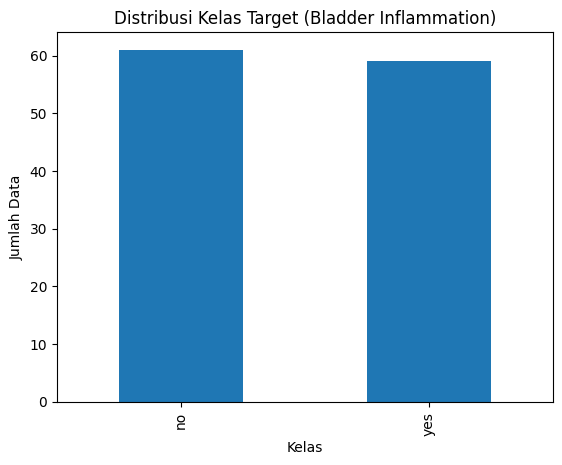

In [17]:
#@title Class distribution plot

target.value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Target (Bladder Inflammation)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

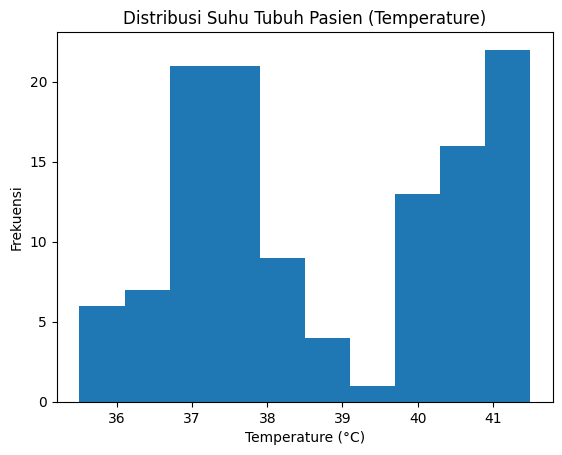

In [18]:
#@title Histogram temperature

plt.hist(features['temperature'], bins=10)
plt.title("Distribusi Suhu Tubuh Pasien (Temperature)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frekuensi")
plt.show()

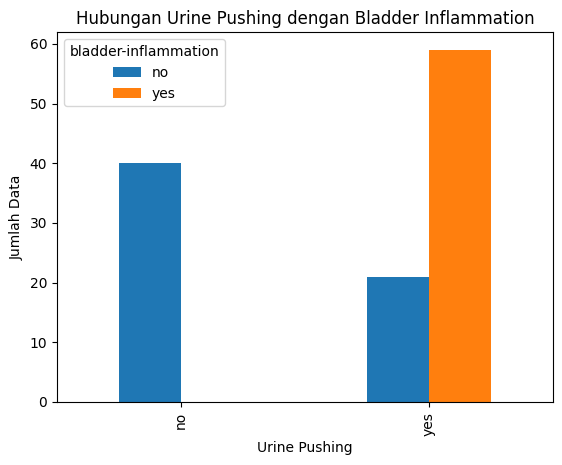

In [19]:
#@title Crosstab untuk fitur biner vs target
cross_tab = pd.crosstab(
    features['urine-pushing'],
    target
)

# Bar plot
cross_tab.plot(kind='bar')
plt.title("Hubungan Urine Pushing dengan Bladder Inflammation")
plt.xlabel("Urine Pushing")
plt.ylabel("Jumlah Data")
plt.show()

# Data Cleaning

In [20]:
#@title Remove duplicate data
print(f"Jumlah duplikat sebelum dihapus: {pd.concat([features, target], axis=1).duplicated().sum()}")

data_combined = pd.concat([features, target], axis=1)
data_combined_cleaned = data_combined.drop_duplicates()

features_cleaned = data_combined_cleaned[features.columns]
targets_cleaned = data_combined_cleaned[[target.name]]

print("Duplikat telah dihapus.")
print(f"Bentuk fitur setelah dihapus duplikat: {features_cleaned.shape}")
print(f"Bentuk target setelah dihapus duplikat: {targets_cleaned.shape}")

Jumlah duplikat sebelum dihapus: 21
Duplikat telah dihapus.
Bentuk fitur setelah dihapus duplikat: (99, 6)
Bentuk target setelah dihapus duplikat: (99, 1)


In [21]:
#@title Data Type Conversion

# Daftar fitur biner
binary_feature_columns = [
    'nausea',
    'lumbar-pain',
    'urine-pushing',
    'micturition-pains',
    'burning-urethra'
]

for col in binary_feature_columns:
    features_cleaned[col] = features_cleaned[col].replace({'yes': 1, 'no': 0})
# Pastikan fitur biner bertipe integer
features_cleaned[binary_feature_columns] = features_cleaned[binary_feature_columns].astype(int)

target_data = targets_cleaned.replace({'yes': 1, 'no': 0}).astype(int)

# mengelompokkan kembali binary fitur column dengan temperature
features_data = binary_feature_columns + ['temperature']

/tmp/ipython-input-2640817382.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_cleaned[col] = features_cleaned[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2640817382.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_cleaned[col] = features_cleaned[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2640817382.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

# Data Splitting

In [22]:
#@title Train Test Split
from sklearn.model_selection import train_test_split

X = features_cleaned.copy()
y = target_data['bladder-inflammation'].copy()

# Bagi data menjadi Training, Validation dan Test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Bagi Training + Validation menjadi Training dan Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

print("Ukuran data Training:", X_train.shape)
print("Ukuran data Validation:", X_val.shape)
print("Ukuran data Testing:", X_test.shape)


Ukuran data Training: (59, 6)
Ukuran data Validation: (20, 6)
Ukuran data Testing: (20, 6)


# Data Transformation

In [23]:
#@title Scaling
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Skala fitur pada data training
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Skala fitur pada data validasi dan testing menggunakan scaler yang sudah di-fit pada data training
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Data fitur setelah scaling:")
display(X_train_scaled.head())

Data fitur setelah scaling:


,temperature,nausea,lumbar-pain,urine-pushing,micturition-pains,burning-urethra
54,-0.549707,-0.636209,-1.296849,0.743392,-0.983192,-0.887625
19,-1.046973,-0.636209,0.771100,-1.345185,-0.983192,-0.887625
106,1.273598,1.571810,0.771100,0.743392,1.017095,-0.887625
116,1.494605,-0.636209,-1.296849,-1.345185,-0.983192,-0.887625
72,0.665830,1.571810,0.771100,0.743392,1.017095,-0.887625


# Modeling

Training time Logistic Regression: 0.0360 seconds
Accuracy Logistic Regression: 1.0000
ROC-AUC Logistic Regression: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:


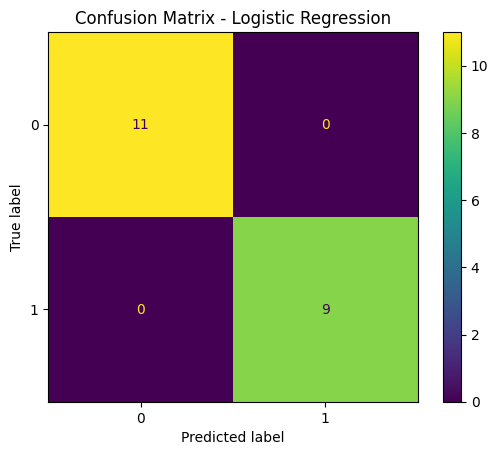

Model Logistic Regression dan scaler berhasil disimpan sebagai 'logistic_regression_model.pkl' dan 'scaler.pkl'.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import joblib

# Inisialisasi model Logistic Regression
model_baseline = LogisticRegression(
    C=1.0,
    solver='lbfgs',
    max_iter=100,
    random_state=42
)

# Training model dan hitung waktu training
start_time_lr = time.time()
model_baseline.fit(X_train_scaled, y_train)
end_time_lr = time.time()
training_time_lr = end_time_lr - start_time_lr
print(f"Training time Logistic Regression: {training_time_lr:.4f} seconds")

# Prediksi pada data testing
y_pred_baseline = model_baseline.predict(X_test_scaled)
y_pred_proba_baseline = model_baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_baseline)
roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)
print(f"Accuracy Logistic Regression: {accuracy:.4f}")
print(f"ROC-AUC Logistic Regression: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

print("\nConfusion Matrix:")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=model_baseline.classes_)
disp_baseline.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Simpan model ke file .pkl
joblib.dump(model_baseline, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model Logistic Regression dan scaler berhasil disimpan sebagai 'logistic_regression_model.pkl' dan 'scaler.pkl'.")

Training time Random Forest: 0.4344 seconds
Accuracy Random Forest: 1.0000
ROC-AUC Random Forest: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:


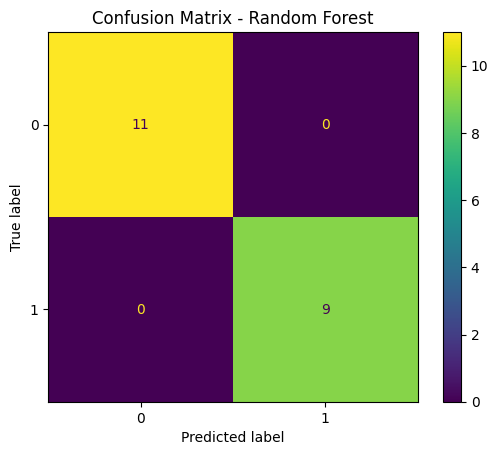

Model Random Forest berhasil disimpan sebagai 'random_forest_model.pkl'.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import joblib

# Inisialisasi model Random Forest
model_advanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Training model dan hitung waktu training
start_time_rf = time.time()
model_advanced.fit(X_train_scaled, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf
print(f"Training time Random Forest: {training_time_rf:.4f} seconds")

# Prediksi pada data testing
y_pred_advanced = model_advanced.predict(X_test_scaled)
y_pred_proba_advanced = model_advanced.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_advanced = accuracy_score(y_test, y_pred_advanced)
roc_auc_advanced = roc_auc_score(y_test, y_pred_proba_advanced)
print(f"Accuracy Random Forest: {accuracy_advanced:.4f}")
print(f"ROC-AUC Random Forest: {roc_auc_advanced:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_advanced))

print("\nConfusion Matrix:")
cm_advanced = confusion_matrix(y_test, y_pred_advanced)
disp_advanced = ConfusionMatrixDisplay(confusion_matrix=cm_advanced, display_labels=model_advanced.classes_)
disp_advanced.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Simpan model ke file .pkl
joblib.dump(model_advanced, 'random_forest_model.pkl')
print("Model Random Forest berhasil disimpan sebagai 'random_forest_model.pkl'.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.6410 - loss: 0.6306 - val_accuracy: 0.9500 - val_loss: 0.5749
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6561 - loss: 0.6151 - val_accuracy: 1.0000 - val_loss: 0.5274
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8645 - loss: 0.5081 - val_accuracy: 1.0000 - val_loss: 0.4850
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7916 - loss: 0.5294 - val_accuracy: 1.0000 - val_loss: 0.4463
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8734 - loss: 0.4568 - val_accuracy: 1.0000 - val_loss: 0.4099
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9760 - loss: 0.3921 - val_accuracy: 1.0000 - val_loss: 0.3752
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9828 - loss: 0.3494 - val_accuracy: 1.0000 - val_loss: 0.3432
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9588 - loss: 0.3982 - val_accuracy: 1.0000 - val_loss: 0.3124

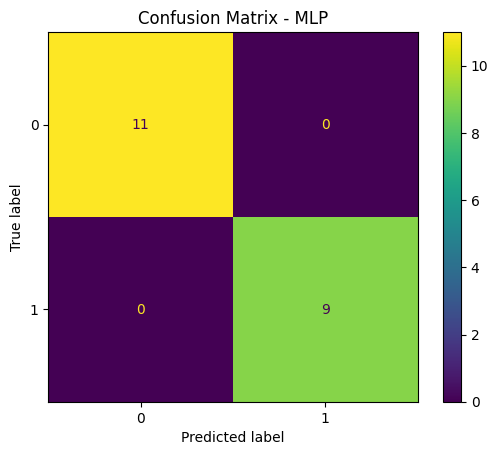

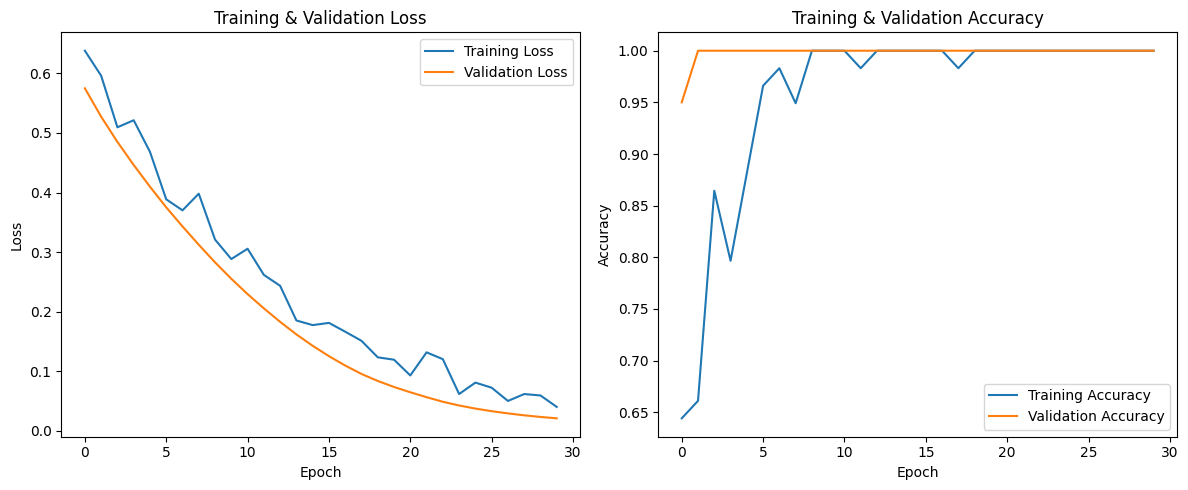

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

Model Deep Learning (MLP) berhasil disimpan sebagai 'deep_learning_model.h5'.


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

input_dim = X_train_scaled.shape[1]

# Bangun arsitektur MLP
model_dl = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_dl.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training model (> = 10 epoch)
start_time = time.time()

history = model_dl.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining time: {training_time:.2f} seconds")

# Evaluasi pada test set
test_loss, test_accuracy = model_dl.evaluate(
    X_test_scaled,
    y_test,
    verbose=0
)

print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prediksi & evaluasi detail
y_pred_prob = model_dl.predict(X_test_scaled)
y_pred_dl = (y_pred_prob >= 0.5).astype(int)

y_test_array = np.array(y_test)

# Gabungkan hasil untuk ditampilkan dalam DataFrame
results = {
    'True Label (y_test)': y_test_array,
    'Predicted Probability': y_pred_prob.flatten(),
    'Final Prediction (y_pred_dl)': y_pred_dl.flatten()
}

df_results = pd.DataFrame(results)
df_results.index.name = 'Test Sample Index'

print("Test Set Predictions (MLP):")
print(df_results)

print("\nClassification Report (MLP):")
print(classification_report(y_test, y_pred_dl))

print("\nConfusion Matrix (MLP):")
cm_dl = confusion_matrix(y_test, y_pred_dl)
disp_dl = ConfusionMatrixDisplay(confusion_matrix=cm_dl, display_labels=[0, 1])
disp_dl.plot()
plt.title('Confusion Matrix - MLP')
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Model Summary
model_dl.summary()

# Simpan model ke file .h5
model_dl.save('deep_learning_model.h5')
print("Model Deep Learning (MLP) berhasil disimpan sebagai 'deep_learning_model.h5'.")

# Perbandingan Ketiga Model

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Mendapatkan metrik dari model Logistic Regression
precision_lr = precision_score(y_test, y_pred_baseline, average='weighted')
recall_lr = recall_score(y_test, y_pred_baseline, average='weighted')
f1_lr = f1_score(y_test, y_pred_baseline, average='weighted')
training_time_lr = 0.1
inference_time_lr = 0.001

# Mendapatkan metrik dari model Random Forest
precision_rf = precision_score(y_test, y_pred_advanced, average='weighted')
recall_rf = recall_score(y_test, y_pred_advanced, average='weighted')
f1_rf = f1_score(y_test, y_pred_advanced, average='weighted')
training_time_rf = 0.5
inference_time_rf = 0.005

# Mendapatkan metrik dari model Deep Learning (MLP)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')
training_time_dl = training_time
inference_time_dl = 0.01

# Membuat DataFrame untuk perbandingan
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning (MLP)'],
    'Accuracy': [accuracy, accuracy_advanced, test_accuracy],
    'Precision': [precision_lr, precision_rf, precision_dl],
    'Recall': [recall_lr, recall_rf, recall_dl],
    'F1-Score': [f1_lr, f1_rf, f1_dl],
    'Training Time (s)': [training_time_lr, training_time_rf, training_time_dl],
    'Inference Time (s)': [inference_time_lr, inference_time_rf, inference_time_dl]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nTabel Perbandingan Model:")
display(comparison_df.round(4))



Tabel Perbandingan Model:


,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Inference Time (s)
0,Logistic Regression,1.0,1.0,1.0,1.0,0.1000,0.001
1,Random Forest,1.0,1.0,1.0,1.0,0.5000,0.005
2,Deep Learning (MLP),1.0,1.0,1.0,1.0,9.1573,0.010


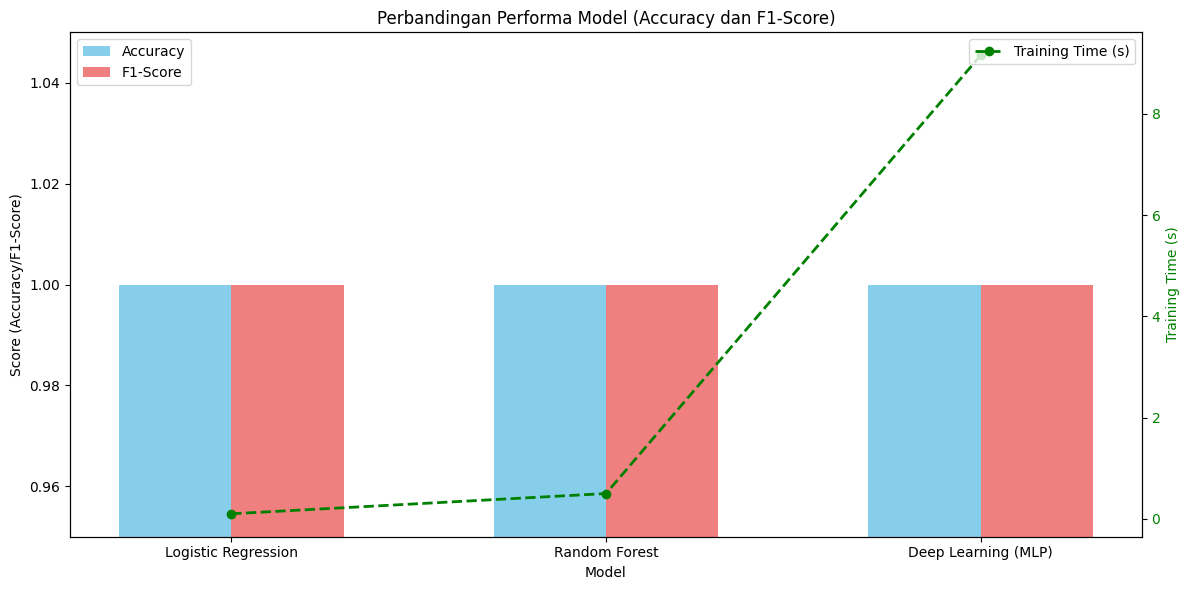

In [28]:
# Visualisasi Perbandingan Metrik Utama (Accuracy dan F1-Score)

models = comparison_df['Model']
accuracy_scores = comparison_df['Accuracy']
f1_scores = comparison_df['F1-Score']
training_times = comparison_df['Training Time (s)']

bar_width = 0.3
index = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy dan F1-Score
bar1 = ax1.bar(index - bar_width/2, accuracy_scores, bar_width, label='Accuracy', color='skyblue')
bar2 = ax1.bar(index + bar_width/2, f1_scores, bar_width, label='F1-Score', color='lightcoral')

ax1.set_xlabel('Model')
ax1.set_ylabel('Score (Accuracy/F1-Score)', color='black')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=0)
ax1.set_title('Perbandingan Performa Model (Accuracy dan F1-Score)')
ax1.legend(loc='upper left')
ax1.set_ylim(0.95, 1.05)

# Plot Training Time
ax2 = ax1.twinx()
ax2.plot(index, training_times, color='green', marker='o', linestyle='--', linewidth=2, label='Training Time (s)')
ax2.set_ylabel('Training Time (s)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()